<a href="https://colab.research.google.com/github/ezzatmostafa96/Independent-Projects/blob/master/effecient_net6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip /content/drive/My\ Drive/test_new_new1.zip 
!unzip /content/drive/My\ Drive/train_new_new1.zip 
!unzip /content/drive/My\ Drive/val_new_new1.zip 

from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, UpSampling2D
from keras import backend as K
import random
import subprocess
import os
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow, figure
import cv2
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from numpy import *
import theano
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img


path_train = "/content/content/lastest/train/train_"
frames = os.listdir(path_train)

target_labels =[]
for i in frames:
  if i.split('_')[0] == 'A':
    target_labels.append(0)
  elif i.split('_')[0] == 'B':
    target_labels.append(1)
  elif i.split('_')[0] == 'C':
    target_labels.append(2)
  elif i.split('_')[0] == 'D':
    target_labels.append(3)
  elif i.split('_')[0] == 'E':
    target_labels.append(4)
  elif i.split('_')[0] == 'F':
    target_labels.append(5)
  elif i.split('_')[0] == 'G':
    target_labels.append(6)
  elif i.split('_')[0] == 'H':
    target_labels.append(7)

path_test = "/content/content/last_last/test/train_"
framestest = os.listdir(path_test)
test_labels =[]
for i in framestest:
  if i.split('_')[0] == 'A':
    test_labels.append(0)
  elif i.split('_')[0] == 'B':
    test_labels.append(1)
  elif i.split('_')[0] == 'C':
    test_labels.append(2)
  elif i.split('_')[0] == 'D':
    test_labels.append(3)
  elif i.split('_')[0] == 'E':
    test_labels.append(4)
  elif i.split('_')[0] == 'F':
    test_labels.append(5)
  elif i.split('_')[0] == 'G':
    test_labels.append(6)
  elif i.split('_')[0] == 'H':
    test_labels.append(7)

path_validate = "/content/content/last_last/val/train_/"
framesval = os.listdir(path_validate)
val_labels =[]
for i in framesval:
  if i.split('_')[0] == 'A':
    val_labels.append(0)
  elif i.split('_')[0] == 'B':
    val_labels.append(1)
  elif i.split('_')[0] == 'C':
    val_labels.append(2)
  elif i.split('_')[0] == 'D':
    val_labels.append(3)
  elif i.split('_')[0] == 'E':
    val_labels.append(4)
  elif i.split('_')[0] == 'F':
    val_labels.append(5)
  elif i.split('_')[0] == 'G':
    val_labels.append(6)
  elif i.split('_')[0] == 'H':
    val_labels.append(7)

import glob
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Archive:  /content/drive/My Drive/test_new_new1.zip
   creating: content/last_last/test/train_/
  inflating: content/last_last/test/train_/H_347.jpg.jpg  
  inflating: content/last_last/test/train_/E_12656.jpg.jpg  
  inflating: content/last_last/test/train_/A_2676.jpg.jpg  
  inflating: content/last_last/test/train_/A_2459.jpg.jpg  
  inflating: content/last_last/test/train_/E_3319.jpg.jpg  
  inflating: content/last_last/test/train_/D_2430.jpg.jpg  
  inflating: content/last_last/test/train_/H_8357.jpg.jpg  
  inflating: content/last_last/test/train_/E_2711.jpg.jpg  
  inflating: content/last_last/test/train_/F_2264.jpg.jpg  
  inflating: content/last_last/test/train_/H_17032.jpg.jpg  
  inflating: content/last_last/test/train_/C_5365.jpg.jpg  
  inflating: content/last_last/test/train_/A_5199.jpg.jpg  
  inflating: content/last_last/test/train_/D_3268.jpg.jpg  
  inflating: content/last_last/test/train_/A_3350.jpg.jpg  
  inflating: content/last_last/test/train_/D_957.jpg.jpg  
  in

Using TensorFlow backend.


In [ ]:
images = glob.glob('/content/content/lastest/train/train_/*')
print(images)


train_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
train_data /= 255

images = glob.glob('/content/content/last_last/test/train_/*')
print(images)

test_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
test_data /= 255

images = glob.glob('/content/content/last_last/val/train_/*')
print(images)

val_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
val_data /= 255


['/content/content/lastest/train/train_/H_19938.jpg.jpg', '/content/content/lastest/train/train_/H_11616.jpg.jpg', '/content/content/lastest/train/train_/H_13104.jpg.jpg', '/content/content/lastest/train/train_/C_8109.jpg.jpg', '/content/content/lastest/train/train_/F_8398.jpg.jpg', '/content/content/lastest/train/train_/E_4880.jpg.jpg', '/content/content/lastest/train/train_/D_2919.jpg.jpg', '/content/content/lastest/train/train_/E_3220.jpg.jpg', '/content/content/lastest/train/train_/H_7610.jpg.jpg', '/content/content/lastest/train/train_/C_8262.jpg.jpg', '/content/content/lastest/train/train_/F_7660.jpg.jpg', '/content/content/lastest/train/train_/D_2039.jpg.jpg', '/content/content/lastest/train/train_/E_10406.jpg.jpg', '/content/content/lastest/train/train_/E_15144.jpg.jpg', '/content/content/lastest/train/train_/C_7360.jpg.jpg', '/content/content/lastest/train/train_/C_8936.jpg.jpg', '/content/content/lastest/train/train_/A_5722.jpg.jpg', '/content/content/lastest/train/train_/A_5

In [ ]:
print("Train shape: ", train_data.shape)
print("Test shape: ", test_data.shape)
print("validate shape: ", val_data.shape)

val_labels = np.array(val_labels)
target_labels = np.array(target_labels)
test_labels = np.array(test_labels)
print(val_labels.shape)
print(test_labels.shape)
print(target_labels.shape)

Train shape:  (2430, 300, 300, 3)
Test shape:  (405, 300, 300, 3)
validate shape:  (405, 300, 300, 3)
(405,)
(405,)
(2430,)


In [ ]:
from keras.utils import to_categorical
train_label = to_categorical(target_labels)
test_label = to_categorical(test_labels)
val_label = to_categorical(val_labels)
print(val_label.shape)
print(test_label.shape)
print(train_label.shape)
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

(405, 8)
(405, 8)
(2430, 8)


In [ ]:
!pip install efficientnet
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications import Xception #name you want to change
from keras.utils.np_utils import to_categorical

# Get the InceptionV3 model so we can do transfer learning
import efficientnet.keras as efn 
base_inception = efn.EfficientNetB6(weights='imagenet', include_top=False, 
                             input_shape=(300,300,3)) 
base_inception.summary()


165527552/165527152 [==============================] - 6s 0us/step
Model: "efficientnet-b6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 150, 150, 56) 1512        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 150, 150, 56) 224         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 150, 150, 56) 0           stem_bn[0][0]                    
_________________

In [ ]:
X_train = base_inception.predict(train_data)
X_train.shape
X_test = base_inception.predict(test_data)
X_test.shape
X_val = base_inception.predict(val_data)
X_val.shape
# -------------------------------------------------------
# -------------------------------------------------------


# -------------------------------------------------------
# -------------------------------------------------------
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------
# change the input_shape accordingly to what's output to the previous output
# -------------------------------------------------------
# -------------------------------------------------------
model = Sequential()
model.add(LSTM(2048, return_sequences=False, input_shape=(100,2304),dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------
# model running 
# -------------------------------------------------------
# -------------------------------------------------------
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight_eff7.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

(2430, 10, 10, 2304)
(405, 10, 10, 2304)
(405, 10, 10, 2304)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2430, 10, 10, 2304)
(405, 10, 10, 2304)
(405, 10, 10, 2304)


In [ ]:
X_train = X_train.reshape(2430, 10*10,2304)
X_test = X_test.reshape(405,10*10,2304)
X_val = X_val.reshape(405, 10*10,2304)

In [ ]:
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight_eff6.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, train_label, epochs=50 , validation_data=(X_val, val_label), callbacks=[mcp_save], batch_size=64)


Train on 2430 samples, validate on 405 samples
Epoch 1/50
2430/2430 [==============================] - 52s 21ms/step - loss: 1.6399 - accuracy: 0.4140 - val_loss: 1.2698 - val_accuracy: 0.5432
Epoch 2/50
2430/2430 [==============================] - 51s 21ms/step - loss: 1.0589 - accuracy: 0.6486 - val_loss: 0.9938 - val_accuracy: 0.6716
Epoch 3/50
2430/2430 [==============================] - 51s 21ms/step - loss: 0.8134 - accuracy: 0.7313 - val_loss: 0.7710 - val_accuracy: 0.7531
Epoch 4/50
2430/2430 [==============================] - 51s 21ms/step - loss: 0.6366 - accuracy: 0.7955 - val_loss: 0.8138 - val_accuracy: 0.7556
Epoch 5/50
2430/2430 [==============================] - 51s 21ms/step - loss: 0.5164 - accuracy: 0.8354 - val_loss: 0.6883 - val_accuracy: 0.8049
Epoch 6/50
2430/2430 [==============================] - 51s 21ms/step - loss: 0.4470 - accuracy: 0.8613 - val_loss: 0.7106 - val_accuracy: 0.8099
Epoch 7/50
2430/2430 [==============================] - 51s 21ms/step - loss:

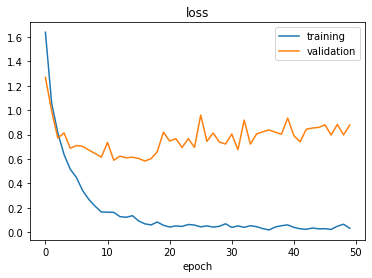

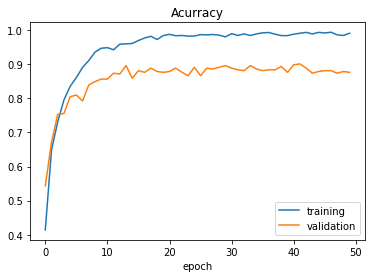

ValueError: ignored

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
# score =history.evaluate(X_test,y_test,verbose=0)
# # print('Test Score:',score[0])
# print('Test Accuracy:',score[1])
# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 10*10, 2048)
prediction = model.predict_classes(prediction_images)
import operator
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

print(prediction)
print(test_labels)

In [ ]:
shutil.move("/content/weight_eff6.hdf5", "/content/drive/My Drive")

'/content/drive/My Drive/weight_eff6.hdf5'

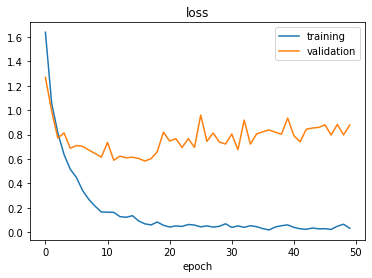

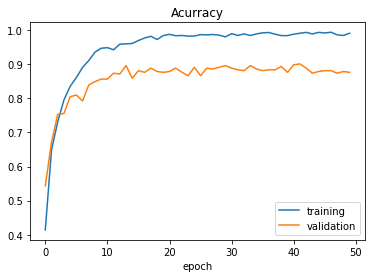

[7 6 5 7 7 6 1 0 0 7 7 0 3 6 6 1 7 3 7 6 7 5 0 6 1 6 1 4 4 3 6 4 2 7 5 6 4
 6 7 2 4 7 2 7 3 5 4 7 7 6 7 7 4 4 1 4 7 6 2 2 4 7 4 6 0 0 2 3 7 2 2 7 4 1
 7 5 7 4 6 4 5 2 7 7 4 7 5 6 3 7 1 7 2 6 2 0 4 2 7 6 0 0 0 4 5 6 5 7 6 4 6
 2 6 6 0 7 7 2 7 7 0 2 4 7 1 7 7 0 7 7 7 1 4 4 2 7 4 5 2 3 1 4 1 4 6 2 7 4
 5 1 7 6 4 5 7 6 7 5 1 6 0 7 7 4 4 3 4 5 0 6 5 7 4 0 3 4 0 3 7 7 6 7 7 5 6
 7 7 6 7 7 5 2 3 7 3 5 1 0 7 4 7 6 6 1 1 2 4 6 7 4 7 3 4 5 0 7 2 1 4 7 4 4
 1 2 4 3 0 0 5 7 7 7 5 6 1 4 4 5 6 4 1 5 3 0 2 4 2 2 5 5 7 4 4 3 7 5 7 2 3
 7 0 6 7 2 3 2 7 5 7 7 7 7 5 3 2 6 5 2 0 5 4 7 5 4 6 0 4 0 1 2 7 0 7 7 0 3
 6 7 4 4 7 3 4 4 6 5 2 1 0 6 0 7 4 2 7 7 3 0 6 4 7 4 2 4 7 2 7 7 3 0 7 3 7
 5 7 6 1 6 5 2 7 5 6 2 5 4 6 4 7 7 5 7 4 7 0 4 7 4 5 2 7 2 0 6 7 7 0 2 6 4
 7 1 7 2 6 0 7 4 0 4 0 3 4 2 6 7 1 1 2 7 5 0 4 7 4 4 5 4 2 5 0 1 4 7 7]
[7 1 5 7 7 6 0 6 0 3 5 0 1 6 6 1 7 3 7 6 7 5 7 6 1 6 1 4 4 1 6 4 2 7 5 6 4
 6 7 2 4 7 2 7 3 5 4 7 7 6 7 5 4 4 1 4 7 6 2 2 4 7 4 6 0 0 2 3 7 2 2 7 4 1
 7 5 7 4 6 4 5 2 7 7 4 1 5 6

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
# score =history.evaluate(X_test,y_test,verbose=0)
# # print('Test Score:',score[0])
# print('Test Accuracy:',score[1])
# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 10*10, 2304)
prediction = model.predict_classes(prediction_images)
import operator
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

print(prediction)
print(test_labels)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

89.13580246913581

In [ ]:
from sklearn.metrics import *

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_labels,prediction,  pos_label=2)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No handles with labels found to put in legend.


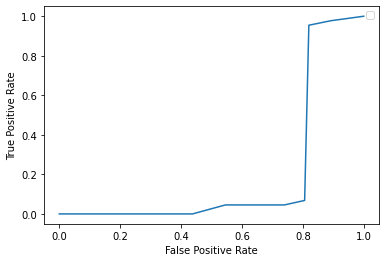

In [ ]:

import matplotlib.pyplot as plt
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,prediction)

array([[32,  1,  1,  0,  0,  0,  1,  1],
       [ 0, 24,  0,  2,  0,  0,  1,  3],
       [ 1,  1, 39,  1,  0,  2,  0,  0],
       [ 0,  0,  0, 19,  0,  1,  0,  1],
       [ 2,  0,  1,  0, 67,  1,  1,  1],
       [ 1,  0,  2,  2,  1, 36,  0,  4],
       [ 2,  0,  1,  0,  2,  1, 46,  0],
       [ 2,  1,  0,  1,  0,  0,  1, 98]])

In [ ]:
metrics.auc(fpr, tpr)

0.19850163686728783

In [ ]:
jaccard_score(test_labels,prediction, average=None)

array([0.72727273, 0.72727273, 0.79591837, 0.7037037 , 0.88157895,
       0.70588235, 0.82142857, 0.86725664])

In [ ]:
f1_score(test_labels,prediction, average='macro')

0.8740226250101268

In [ ]:
cohen_kappa_score(test_labels,prediction,weights='quadratic')

0.856194671882556

In [ ]:
multilabel_confusion_matrix(test_labels,prediction)

array([[[361,   8],
        [  4,  32]],

       [[372,   3],
        [  6,  24]],

       [[356,   5],
        [  5,  39]],

       [[378,   6],
        [  2,  19]],

       [[329,   3],
        [  6,  67]],

       [[354,   5],
        [ 10,  36]],

       [[349,   4],
        [  6,  46]],

       [[292,  10],
        [  5,  98]]])